## 程序说明
时间: 2018-01-25  
说明: 该程序是一个包含两个隐藏层的神经网络，程序会保存每轮训练的acc和loss，并且绘制他们  
数据集：mnist  

## 加载keras模块

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

## 写一个LossHistorry类，保存loss和acc

In [5]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch': []}
        
    def on_batch_end(self,batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
        
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc='upper right')
        plt.show()

## 变量初始化

In [6]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

## 准备数据

In [8]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float')
X_test = X_test.reshape(10000, 784).astype('float')
X_train /= 255
X_test /= 255

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

In [19]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

##  建立模型

In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

## 打印模型

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

## 训练与评估

## 编译模型

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

## 创建一个实例history

In [24]:
history = LossHistory()

## 迭代训练
>这个地方要加上callback参数

In [25]:
model.fit(X_train, Y_train,
         batch_size=batch_size, epochs=nb_epoch,
         verbose=1,
         validation_data=(X_test, Y_test),
         callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.2456 - acc: 0.9246 - val_loss: 0.1133 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1025 - acc: 0.9695 - val_loss: 0.0841 - val_acc: 0.9767
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0765 - acc: 0.9767 - val_loss: 0.0757 - val_acc: 0.9783
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0599 - acc: 0.9821 - val_loss: 0.0760 - val_acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0499 - acc: 0.9850 - val_loss: 0.0834 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0445 - acc: 0.9870 - val_loss: 0.0702 - val_acc: 0.9816
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0399 - acc: 0.9887 - val_loss: 0.0849 - val_a

## 模型评估

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score :', score[0])
print('Test accuracy: ', score[1])

Test score : 0.10198883753576737
Test accuracy:  0.9833


## 绘制acc-loss 曲线

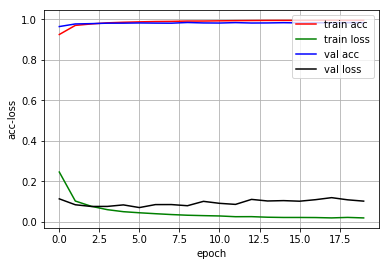

In [27]:
history.loss_plot('epoch')

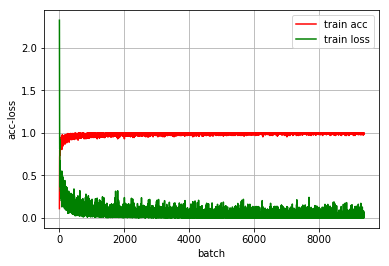

In [28]:
history.loss_plot('batch')